In [33]:
# 简单实现二分类
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
from sklearn.metrics import classification_report  # 模型评估
from sklearn import preprocessing  # 进行数据的标准化

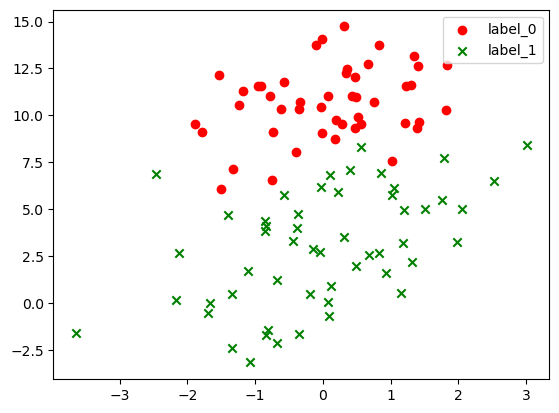

In [34]:
# 数据标准化
scale = False  # 默认先不进行标准化(调用sklearn库中的数据标准化)
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=',')  # 二维数据, 最后一列代表标签值（0，1）
x_data = data[:, :-1]
y_data = data[:, -1]  # 标签列


# 先画图展示
def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    # 切分这两类数据进行画图
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i, 0])
            y1.append(x_data[i, 1])
    plt.scatter(x0, y0, c='r', marker='o')
    plt.scatter(x1, y1, c='g', marker='x')
    plt.legend(labels=['label_0', 'label_1'])  # 绘制标签


plot()
plt.show()

In [35]:
# logistic回归要做的就是进行画线切分
x_data = data[:, :-1]
y_data = data[:, -1, np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
# 添加偏置
X_data = np.concatenate((np.ones((100, 1)), x_data), axis=1)
X_data

(100, 2)
(100, 1)


array([[ 1.0000000e+00, -1.7612000e-02,  1.4053064e+01],
       [ 1.0000000e+00, -1.3956340e+00,  4.6625410e+00],
       [ 1.0000000e+00, -7.5215700e-01,  6.5386200e+00],
       [ 1.0000000e+00, -1.3223710e+00,  7.1528530e+00],
       [ 1.0000000e+00,  4.2336300e-01,  1.1054677e+01],
       [ 1.0000000e+00,  4.0670400e-01,  7.0673350e+00],
       [ 1.0000000e+00,  6.6739400e-01,  1.2741452e+01],
       [ 1.0000000e+00, -2.4601500e+00,  6.8668050e+00],
       [ 1.0000000e+00,  5.6941100e-01,  9.5487550e+00],
       [ 1.0000000e+00, -2.6632000e-02,  1.0427743e+01],
       [ 1.0000000e+00,  8.5043300e-01,  6.9203340e+00],
       [ 1.0000000e+00,  1.3471830e+00,  1.3175500e+01],
       [ 1.0000000e+00,  1.1768130e+00,  3.1670200e+00],
       [ 1.0000000e+00, -1.7818710e+00,  9.0979530e+00],
       [ 1.0000000e+00, -5.6660600e-01,  5.7490030e+00],
       [ 1.0000000e+00,  9.3163500e-01,  1.5895050e+00],
       [ 1.0000000e+00, -2.4205000e-02,  6.1518230e+00],
       [ 1.0000000e+00, -3.6453

In [36]:
# Sigmoid函数
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))


def cost(xMat, yMat, w):  # 计算单个样本的代价函数
    C1 = np.multiply(yMat, np.log(Sigmoid(xMat * w)))
    C2 = np.multiply(1 - yMat, np.log(1 - Sigmoid(xMat * w)))
    # 交叉熵
    return np.sum(C1 + C2) / -(len(xMat))  # 返回所有点的损失函数的均值


def Gradient_descent(xArr, yArr):  # 梯度下降得到w权值参数
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)

    learn_rate = 0.001  # 学习率
    epoch = 1001  # 迭代次数
    costlist = []  # 保存cost值
    # 计算样本的行列数
    m, n = np.shape(xMat)

    # 设置初始的权值
    w = np.mat(np.ones((n, 1)))  # 3*1

    # 迭代
    for i in range(epoch + 1):
        hi = Sigmoid(xMat * w)  # m*3 3*1 ->m*1
        # 计算误差
        w_grad = xMat.T * (hi - yMat)  # n*m * m*1 -> w_grad = n*1(3*1)
        w = w - learn_rate * w_grad

        # 进行迭代观测，每5轮迭代就把总损失函数的值记录到costlist
        if i % 5 == 0:
            costlist.append(cost(xMat, yMat, w))

    return w, costlist

In [37]:
w, costlist = Gradient_descent(X_data, y_data)
print(w)
costlist  # 共201个损失值

[[ 5.44236731]
 [ 0.58637451]
 [-0.78387705]]


[3.137187765767419,
 0.48309995181889387,
 0.45846678664747764,
 0.4373979108844563,
 0.4194084095885346,
 0.4040243465965359,
 0.39080696778273355,
 0.37936863057846115,
 0.3693796003502332,
 0.36056746990931887,
 0.3527118934126522,
 0.3456371339197898,
 0.33920419672976415,
 0.333303557847368,
 0.32784892681660566,
 0.32277213603978633,
 0.31801907227685317,
 0.3135464963076046,
 0.309319584595889,
 0.305310041261965,
 0.3014946525935999,
 0.2978541812270454,
 0.29437251938617565,
 0.2910360390503405,
 0.28783309164993703,
 0.28475362134042337,
 0.2817888646760192,
 0.27893111615978095,
 0.2761735441699038,
 0.27351004554251124,
 0.27093512993316404,
 0.26844382721608395,
 0.26603161278822773,
 0.2636943468576129,
 0.261428224711049,
 0.25922973564987317,
 0.2570956288088141,
 0.25502288447405436,
 0.2530086898228281,
 0.2510504182415847,
 0.24914561156021495,
 0.24729196467909337,
 0.24548731217352565,
 0.24372961654403988,
 0.24201695784638996,
 0.24034752448642208,
 0.23871960500

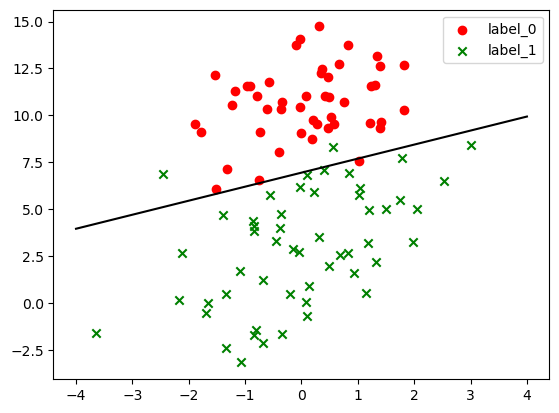

In [38]:
# 绘制图像
plot()
x_test = [[-4], [4]]
y_test = (-w[0] - x_test * w[1]) / w[2]  # 决策边界的方程为w0 + w1*x1 + w2*x2 = 0；反解出x2的值即可
plt.plot(x_test, y_test, 'k')
plt.show()
# 最终结果其实50次迭代并不够，需要更多次迭代cost会进一步下降，考虑提高迭代次数，epoch = 1001

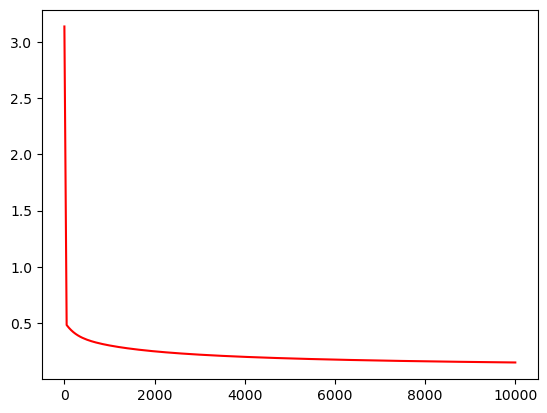

In [39]:
# 绘制costlist的图像，观察损失值的变化
x = np.linspace(0, 10001, 201)
plt.plot(x, costlist, c='r')
plt.show()

In [42]:
# 考虑预测
def predict(x_data, w):
    # scale数据标准化
    if scale == True:
        sklearn.preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    w = np.mat(w)
    return [1 if x>=0.5 else 0 for x in Sigmoid(xMat * w)]

predictions = predict(X_data,w)
print("预测分类结果为：", predictions)
print("原数据分类结果为:")
data[:, -1]

预测分类结果为： [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]
原数据分类结果为: 

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.])